In [1]:
with open("alice-chapter-1.txt") as file_obj:
    chapter_1 = file_obj.read()

In [2]:
chapter_1.count("Alice")
# result: 28

28

In [3]:
words = chapter_1.split()
words.count("Alice")
# result: 20

20

In [4]:
# 把文字轉為細楷
chapter_1 = chapter_1.lower()
# 移除 's 的所有格
chapter_1 = chapter_1.replace("'s'","").replace("’s","")
# 移除標點符號
import string
punctuations = string.punctuation + "“”‘’–—"
for punctuation in punctuations:
    chapter_1 = chapter_1.replace(punctuation, "")

# 分柝及數 "alice"
words = chapter_1.split()
words.count("alice")
# result: 28

28

In [5]:
from collections import Counter 
most_words = Counter(words).most_common(20)
print(most_words)

[('the', 90), ('she', 79), ('to', 74), ('and', 65), ('it', 65), ('was', 53), ('a', 52), ('of', 41), ('i', 30), ('alice', 28), ('that', 27), ('her', 26), ('in', 26), ('down', 23), ('very', 23), ('but', 21), ('for', 21), ('had', 20), ('you', 18), ('not', 16)]


In [6]:
import pandas as pd
df = pd.DataFrame(most_words, columns=("Word","Count"))
df # 在 Jupyter Notebook 中印出 DataFrame 數據

,Word,Count
0,the,90
1,she,79
2,to,74
3,and,65
4,it,65
5,was,53
6,a,52
7,of,41
8,i,30
9,alice,28


In [7]:
df.set_index("Word", inplace=True)
df

,Count
Word,
the,90
she,79
to,74
and,65
it,65
was,53
a,52
of,41
i,30


In [8]:
df.sort_values(by="Count", ascending=True, inplace=True)
df

,Count
Word,
not,16
you,18
had,20
for,21
but,21
very,23
down,23
in,26
her,26


In [9]:
df["Color"] = "lightgrey"
df.loc["alice", "Color"] = "blue"
df

,Count,Color
Word,,
not,16,lightgrey
you,18,lightgrey
had,20,lightgrey
for,21,lightgrey
but,21,lightgrey
very,23,lightgrey
down,23,lightgrey
in,26,lightgrey
her,26,lightgrey


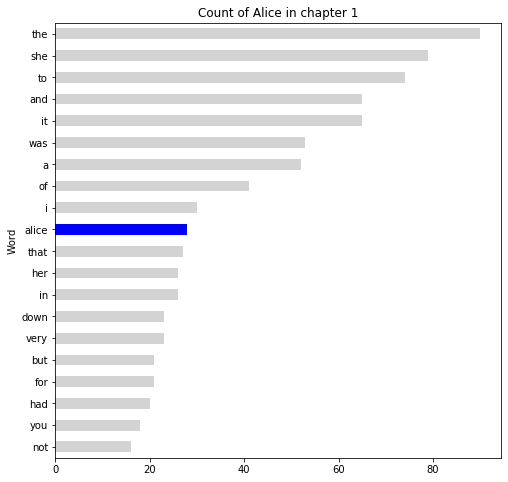

In [10]:
df["Count"].plot(kind="barh", color=df["Color"], figsize=(8,8), title="Count of Alice in chapter 1")

---

In [12]:
def process_text(content):
    import string    
    content = content.lower()
    content = content.replace("'s'","").replace("’s","")
    punctuations = string.punctuation + "“”‘’–—"
    for punctuation in punctuations:
        content = content.replace(punctuation, "")
    return content

process_text("Test. This is Thomas' toy. That’s Alice's toy.")

'test this is thomas toy that alices toy'

In [13]:
import requests
from bs4 import BeautifulSoup
from collections import Counter 

url = "https://www.gcs.gov.mo/detail/en/N21LdGKSOM?2"

# 下載網站內容
res = requests.get(url)

# 把網站內容分析成內容結構樹
soup = BeautifulSoup(res.text)

# 按網站的內容結構，主內容位置 class=mainBody 的 class=asideBody 元素內
element = soup.select_one(".mainBody .asideBody")

# 將主內容元素的文章內容處理
article = element.text
article = process_text(article)

# 處理後數出最常出現的 40 個字詞
words = article.split()
Counter(words).most_common(40)

[('the', 28),
 ('and', 27),
 ('light', 25),
 ('macao', 17),
 ('to', 16),
 ('of', 16),
 ('at', 15),
 ('for', 12),
 ('festival', 11),
 ('2021', 10),
 ('do', 10),
 ('interactive', 9),
 ('installations', 8),
 ('installation', 8),
 ('as', 8),
 ('on', 7),
 ('in', 7),
 ('january', 6),
 ('from', 6),
 ('projection', 6),
 ('mapping', 6),
 ('will', 6),
 ('news', 5),
 ('16', 5),
 ('travellers', 5),
 ('mgto', 5),
 ('games', 5),
 ('shows', 5),
 ('largo', 5),
 ('district', 5),
 ('is', 4),
 ('extended', 4),
 ('until', 4),
 ('government', 4),
 ('tourism', 4),
 ('extension', 4),
 ('well', 4),
 ('game', 4),
 ('are', 4),
 ('popular', 3)]